# LOAD THE DATASET
( the dataset is entirely based from usa)

In [1]:
import pandas as pd

df = pd.read_csv('fraudTrain.csv') 

  ## DATA PREPROCESSING

In [2]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
data=df
# remove unecessary fields 
data.drop(columns=['Unnamed: 0', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'merchant', 'city_pop', 'unix_time'], inplace=True)


In [6]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


## Data Visulaization 

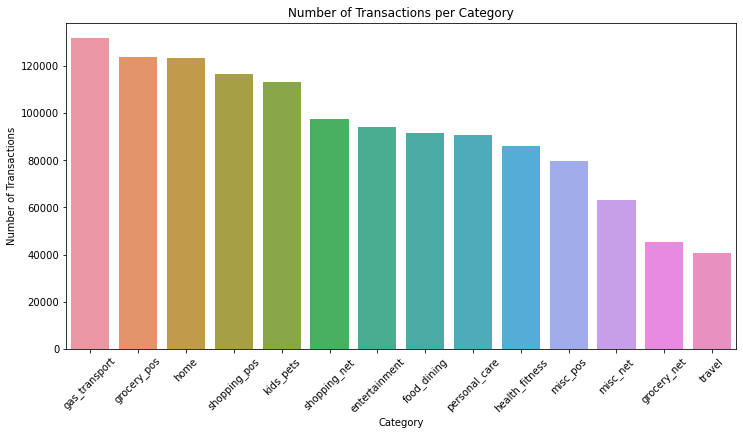

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='category', order=data['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Transactions per Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()


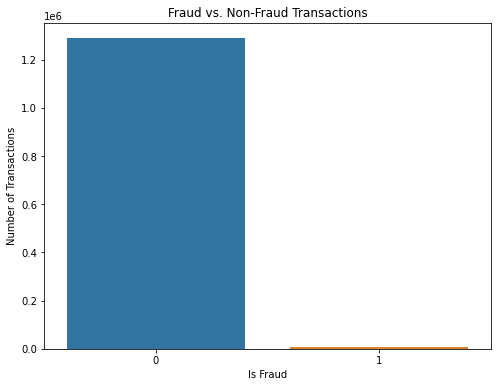

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='is_fraud')
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.show()


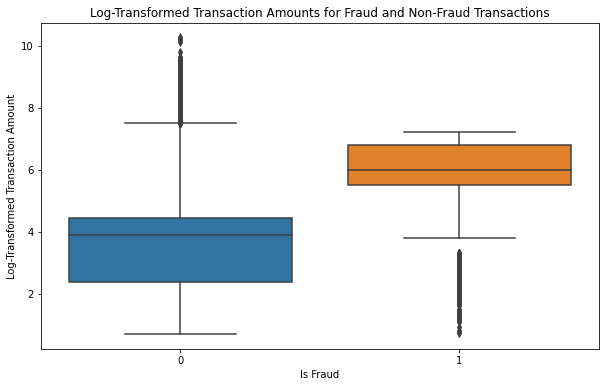

In [9]:
import numpy as np

# Apply log transformation to the 'amt' column
data['log_amt'] = np.log1p(data['amt'])

# Visualize the transformed data
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='is_fraud', y='log_amt')
plt.title('Log-Transformed Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Log-Transformed Transaction Amount')
plt.show()


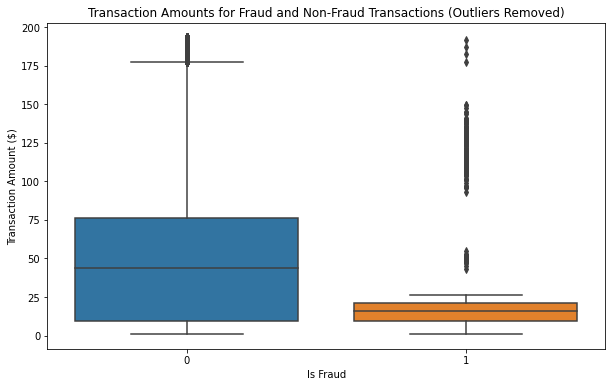

In [10]:
# Calculate the IQR for 'amt'
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['amt'] >= lower_bound) & (data['amt'] <= upper_bound)]

# Visualize the data without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='is_fraud', y='amt')
plt.title('Transaction Amounts for Fraud and Non-Fraud Transactions (Outliers Removed)')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount ($)')
plt.show()


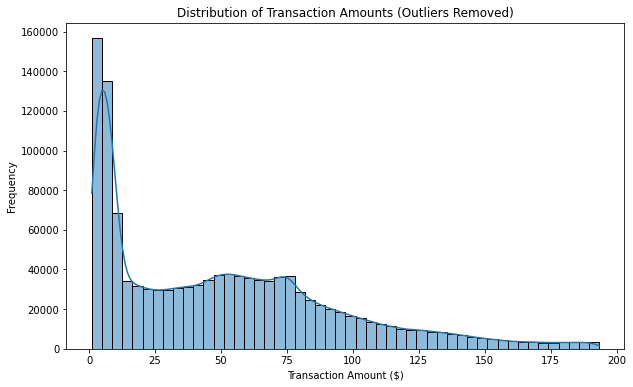

In [11]:
# Distribution of transaction amounts after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (Outliers Removed)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()

## Modeling (Random Forest Classifier)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
# Convert date columns to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

# Fill or drop NaN values in date columns
data['trans_date_trans_time'].fillna(method='ffill', inplace=True)
data['dob'].fillna(method='ffill', inplace=True)

In [13]:
## To optimize memory usage used astype('int32')
# Feature engineering
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour.astype('int32')
data['transaction_day'] = data['trans_date_trans_time'].dt.day.astype('int32')
data['transaction_month'] = data['trans_date_trans_time'].dt.month.astype('int32')
data['transaction_year'] = data['trans_date_trans_time'].dt.year.astype('int32')
data['transaction_weekday'] = data['trans_date_trans_time'].dt.weekday.astype('int32')
data['is_weekend'] = data['transaction_weekday'].isin([5, 6]).astype('int32')

# Calculate age of the cardholder
data['age'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year).astype('int32')

# Encode categorical features
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender']).astype('int32')
data['category'] = le.fit_transform(data['category']).astype('int32')
data['job'] = le.fit_transform(data['job']).astype('int32')

# Calculate average transaction amount per credit card
data['avg_amt_per_card'] = data.groupby('cc_num')['amt'].transform('mean').astype('float32')

# Calculate time since last transaction for each credit card
data['trans_date_trans_time_unix'] = data['trans_date_trans_time'].astype(np.int64)
data = data.sort_values(by=['cc_num', 'trans_date_trans_time_unix'])
data['time_diff'] = data.groupby('cc_num')['trans_date_trans_time_unix'].diff().fillna(0).astype('int32')

# Calculate the distance between transaction location and user location
def haversine_np(lon1, lat1, lon2, lat2):
    R = 6371.0  # Earth radius(in km)
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    km = R * c
    return km.astype('float32')

data['distance'] = haversine_np(data['long'], data['lat'], data['merch_long'], data['merch_lat'])

E:\anaconda\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [14]:
# Drop unnecessary columns
data.drop(columns=['trans_date_trans_time', 'lat', 'long', 'merch_lat', 'merch_long', 'dob'], inplace=True)

# Define features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluating the modle
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257786
           1       0.97      0.77      0.86      1549

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335

ROC AUC Score: 0.9872614035402033
